<a href="https://colab.research.google.com/github/tommybebe/til/blob/master/ml/Libra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's say i'm a construction company and I want to estimate different information about a new house i'm building..


Let's first get everything setup. This is where you install the library and then import everything you need.

The client object is the base of libra and is where everything is stored. It's the only import you'll ever need. 


In [1]:
!pip install libra


from libra import client #this is the only import you'll ever have to worry about :)

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 102kB 4.0MB/s 
     |████████████████████████████████| 778kB 4.6MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 1.8MB 8.7MB/s 
     |████████████████████████████████| 7.1MB 26.1MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 137.3MB 56kB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
     |████████████████████████████████| 3.0MB 38.9MB/s 
     |████████████████████████████████| 890kB 41.9MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 133kB 49.4MB/s 
     |████████████████████████████████| 6.7MB 39.6MB/s 
     |████████████████████████████████| 4.4MB 38.6MB/s 
     |████████████████████████████████| 112kB 48.9MB/s 
     |████████████████████████████████| 256kB 34.9MB/s 
   

Now, i'm going to load up the california housing dataset found here: www.kaggle.com/camnugent/california-housing-prices. If you're following along, you'll have to upload it yourself because collaboratory resets storage runtimes.

A new client object should be created for every dataset that you're working in. You'll see a process logger below documenting what libra is doing on the inside.

In [2]:
from libra import client
a_client = client('housing.csv')

Creating client object
  |- Reading in dataset




First, I'm going to build a neural network to estimate the proximity to the ocean, this column is named 'ocean_proximity' in the csv file.

Reading in dataset
->Target column found: ocean_proximity
  |- Establishing callback function
    |- Training initial model
      | Initial number of layers   | Training Accuracy        | Test Accuracy             |
      | 3                          | 0.876675009727478        | 0.8837420344352722        |
      |- Testing number of layers
        | Current number of layers  | Training Accuracy       | Test Accuracy            |
        | 3                         | 0.883109986782074       | 0.883439302444458        |
        | 4                         | 0.8747066259384155      | 0.8725401163101196       |

      ->Best number of layers found: 3
      ->Training Accuracy: 0.876675009727478
      ->Test Accuracy: 0.8837420344352722

        |- Stored model under 'classification_ANN' key




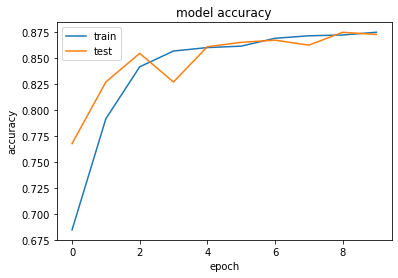

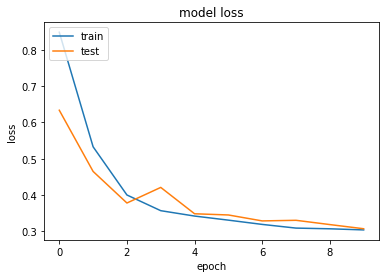

In [3]:
a_client.neural_network_query('accurately estimate the ocean proximity', epochs=10) #lets say I want to run this query fairly quickly, so I limit the epochs / number of iterations

Let's see if we can generate some more insightful information about my model for ocean proximity.


Analyzing classification_ANN for further understanding
  |- Making predictions for test data
    |- Transforming dataset for plotting module
    ->Plotting ROC curves and creating confusion matrix...
      |- Investigating potential issues with calculations
        |- Gathering metrics for display: 
        ->Accuracy on test set: 0.8837420344352722
        ->Recall on test set: 0.8837420526793823
        ->Precision on test set: 0.8837420526793823
        ->F1 Score on test set: 0.8837420526793823



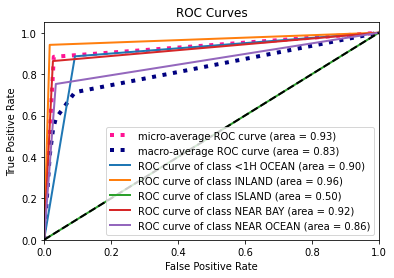

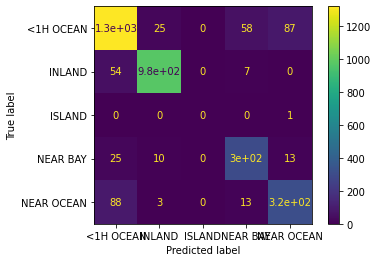

In [4]:
a_client.analyze()

Cool! Now, it's time to see what we've created. Since I just called the neural network query, I don't have to refer to it. 

In [5]:
a_client.accuracy()
a_client.losses()

#this is all the information that the query generated
a_client.info()

dict_keys(['id', 'model', 'num_classes', 'plots', 'target', 'preprocesser', 'interpreter', 'test_data', 'losses', 'accuracy', 'scores'])

Hm... Now I want some more information about my housing district. I want to build a neural network to estimate the median house value given information about my house.

Reading in dataset
->Target column found: median_house_value
  |- Establishing callback function
    |- Training initial model
      | Initial number of layers   | Training Loss            | Test Loss                 |
      | 3                          | 0.23181785643100739      | 0.23399947583675385       |
      |- Testing number of layers
        | Current number of layers  | Training Loss           | Test Loss                |
        | 3                         | 0.22554218769073486     | 0.2287570685148239       |
        | 4                         | 0.21663321554660797     | 0.22783870995044708      |
        | 5                         | 0.1918664574623108      | 0.20102117955684662      |
        | 6                         | 0.18161219358444214     | 0.20545341074466705      |

      ->Best number of layers found: 5
      ->Training Loss: 0.1918664574623108
      ->Test Loss: 0.20102117955684662
->Saved model to disk as model0

        |- Stored model under 'regression_ANN'

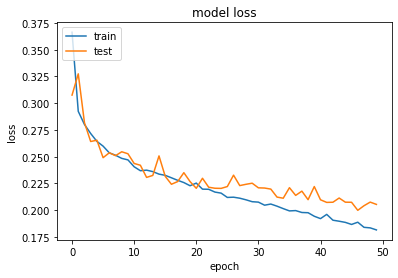

In [6]:
a_client.neural_network_query('model the median house value ', drop=['ocean_proximity'], save_model=True)